In [2]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'1.12.1+cu113'

In [ ]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing 
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [8]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

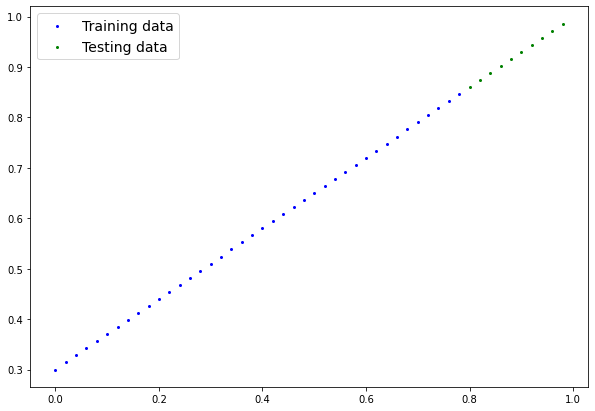

In [ ]:
plot_predictions()

In [ ]:
class Linearregressionmodel(nn.Module):
  def __init__(self):
    super().__init__()

    self.weights= nn.Parameter(torch.rand(1, dtype=torch.float),requires_grad=True)
    self.bias= nn.Parameter(torch.rand(1, dtype=torch.float), requires_grad=True)

  def forward(self,x:torch.Tensor):
    return self.weights * x + self.bias


In [ ]:
# Set manual seed since nn.Parameter are randomly initialzied
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = Linearregressionmodel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters())


[Parameter containing:
 tensor([0.8823], requires_grad=True), Parameter containing:
 tensor([0.9150], requires_grad=True)]

In [ ]:
# Make predictions with model
with torch.inference_mode(): 
    y_preds = model_0(X_test)

# Note: in older PyTorch code you might also see torch.no_grad()
# with torch.no_grad():
#   y_preds = model_0(X_test)

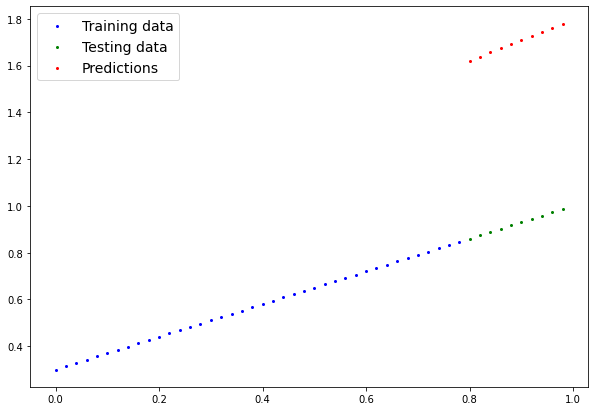

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
torch.manual_seed(10)
# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = Linearregressionmodel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters())


[Parameter containing:
 tensor([0.4581], requires_grad=True), Parameter containing:
 tensor([0.4829], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.4581])), ('bias', tensor([0.4829]))])

In [ ]:
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds[-5:]

tensor([[0.8951],
        [0.9043],
        [0.9135],
        [0.9226],
        [0.9318]])

In [ ]:
# Check the predictions
print(f"Number of testing samples:{len(X_test)}")
print(f"Number of predicting samples:{len(y_preds)}")
print(y_preds)

Number of testing samples:10
Number of predicting samples:10
tensor([[0.8493],
        [0.8585],
        [0.8676],
        [0.8768],
        [0.8860],
        [0.8951],
        [0.9043],
        [0.9135],
        [0.9226],
        [0.9318]])


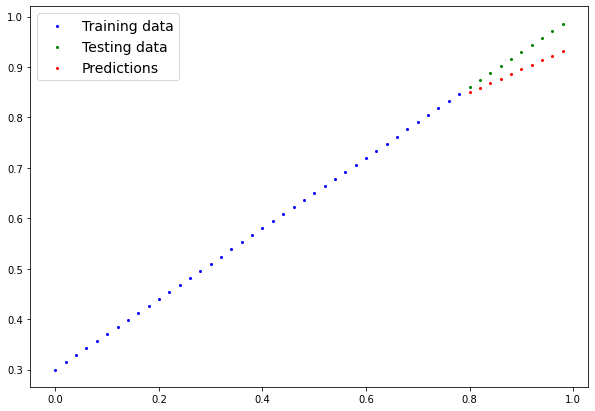

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
y_test-y_preds


tensor([[0.0107],
        [0.0155],
        [0.0204],
        [0.0252],
        [0.0300],
        [0.0349],
        [0.0397],
        [0.0445],
        [0.0494],
        [0.0542]])

In [ ]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params= model_0.parameters(), lr= 0.01)


In [ ]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 100

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside 
    y_pred = model_0(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.021093714982271194 | MAE Test Loss: 0.048494935035705566 
Epoch: 10 | MAE Train Loss: 0.017654910683631897 | MAE Test Loss: 0.04022238776087761 
Epoch: 20 | MAE Train Loss: 0.014224603772163391 | MAE Test Loss: 0.032636724412441254 
Epoch: 30 | MAE Train Loss: 0.010790100321173668 | MAE Test Loss: 0.024364184588193893 
Epoch: 40 | MAE Train Loss: 0.007351298816502094 | MAE Test Loss: 0.016091639176011086 
Epoch: 50 | MAE Train Loss: 0.003922673873603344 | MAE Test Loss: 0.008505970239639282 
Epoch: 60 | MAE Train Loss: 0.003945067524909973 | MAE Test Loss: 0.011978155001997948 
Epoch: 70 | MAE Train Loss: 0.003945067524909973 | MAE Test Loss: 0.011978155001997948 
Epoch: 80 | MAE Train Loss: 0.003945067524909973 | MAE Test Loss: 0.011978155001997948 
Epoch: 90 | MAE Train Loss: 0.003945067524909973 | MAE Test Loss: 0.011978155001997948 


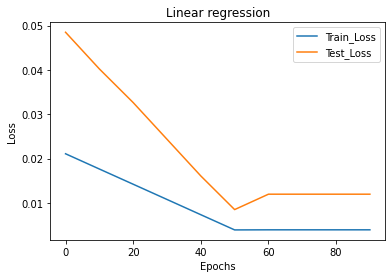

In [ ]:
plt.plot(epoch_count, train_loss_values, label="Train_Loss")
plt.plot(epoch_count, test_loss_values, label="Test_Loss")
plt.title('Linear regression')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [ ]:
# Find our model's learned parameters
print("The model learned the following values for weights and bias:")
print(model_0.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.3059]))])

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


In [ ]:
model_0.eval()

with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds


tensor([[0.8619],
        [0.8758],
        [0.8897],
        [0.9036],
        [0.9175],
        [0.9314],
        [0.9453],
        [0.9592],
        [0.9731],
        [0.9871]])

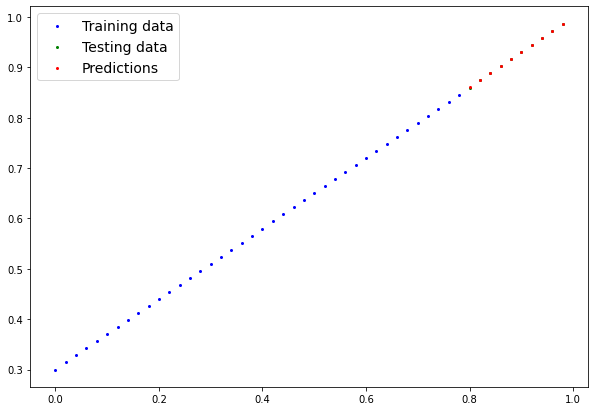

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
from pathlib import Path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok= True)
MODEL_NAME= "01_pytorch_workflow_model.pth"
MODEL_SAVE_PATH= MODEL_PATH/MODEL_NAME
print(f"saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)



saving model to: models/01_pytorch_workflow_model.pth


In [ ]:
!ls -l models/

total 4
-rw-r--r-- 1 root root 1063 Nov 29 15:10 01_pytorch_workflow_model.pth


In [ ]:
loaded_model_0 = Linearregressionmodel()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_pred= loaded_model_0(X_test)

y_preds =loaded_model_pred
print(y_pred[:5])


tensor([[0.2959],
        [0.3097],
        [0.3235],
        [0.3373],
        [0.3512]], grad_fn=<SliceBackward0>)


In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
torch.__version__

'1.12.1+cu113'

In [2]:
device= "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [3]:
start = 0
end = 1
step = 0.02
weights = 0.3
bias = 0.7

X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weights * X + bias
X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.7000],
         [0.7060],
         [0.7120],
         [0.7180],
         [0.7240],
         [0.7300],
         [0.7360],
         [0.7420],
         [0.7480],
         [0.7540]]))

In [4]:
split_size = 0.8
train_split = int(len(X) * split_size)
X_train = X[:train_split]
y_train = y[:train_split]
X_test = X[train_split:]
y_test = y[train_split:]
len(X_train), len(X_test), len(X_test), len(X_test)

(40, 10, 10, 10)

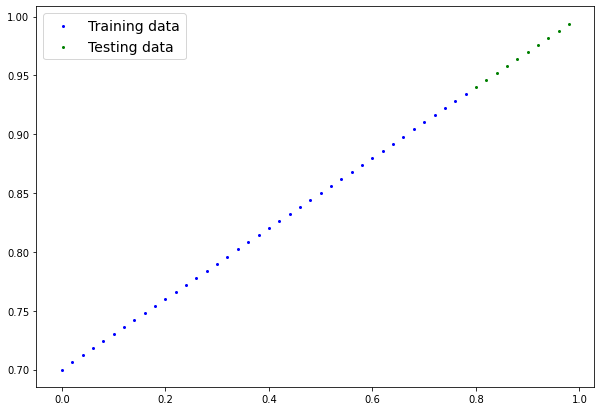

In [9]:
plot_predictions(X_train, y_train, X_test, y_test)

In [6]:
class Linearregressionmodel2(nn.Module):
  def __init__(self):
    super().__init__()
 
    self.weights = nn.Parameter(torch.randn(1, dtype = torch.float), requires_grad = True)
    self.bias = nn.Parameter(torch.randn(1, dtype = torch.float), requires_grad = True)

  def forward(self, x:torch.tensor):
    return self.weights * x + self.bias


torch.manual_seed(33)
model2 = Linearregressionmodel2()
model2.parameters(), model2.state_dict()

(<generator object Module.parameters at 0x7ff2431a6650>,
 OrderedDict([('weights', tensor([1.1982])), ('bias', tensor([-0.3998]))]))

In [26]:
next(model_0.parameters()).device

NameError: ignored

In [10]:
model2.to(device)
next(model2.parameters()).device


device(type='cuda', index=0)

In [11]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params= model2.parameters(), lr =0.01)

In [12]:
epochs = 1000
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):

  model2.train()
  y_pred= model2(X_train)
  loss = loss_fn(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model2.eval()
  with torch.inference_mode():

      y_preds = model2(X_test)
      test_loss = loss_fn(y_test, y_preds)

      if epoch % 100 == 0:


          print(f"Epochs count:{epoch}|,Train loss: {loss}|, Test loss: {test_loss}")




Epochs count:0|,Train loss: 0.7495331764221191|, Test loss: 0.2869669497013092
Epochs count:100|,Train loss: 0.21436582505702972|, Test loss: 0.44038867950439453
Epochs count:200|,Train loss: 0.17715494334697723|, Test loss: 0.41358810663223267
Epochs count:300|,Train loss: 0.1428089737892151|, Test loss: 0.33292633295059204
Epochs count:400|,Train loss: 0.10847043991088867|, Test loss: 0.2529485821723938
Epochs count:500|,Train loss: 0.07412242144346237|, Test loss: 0.17228494584560394
Epochs count:600|,Train loss: 0.03978506848216057|, Test loss: 0.09230869263410568
Epochs count:700|,Train loss: 0.005435727536678314|, Test loss: 0.011645621620118618
Epochs count:800|,Train loss: 0.001266908715479076|, Test loss: 0.013564866967499256
Epochs count:900|,Train loss: 0.001266908715479076|, Test loss: 0.013564866967499256


In [13]:
print(model2.state_dict())
print(f"And the original values of weights and bias are: {weights}, {bias}")

OrderedDict([('weights', tensor([0.3027], device='cuda:0')), ('bias', tensor([0.6977], device='cuda:0'))])
And the original values of weights and bias are: 0.3, 0.7


In [14]:
model2.eval()
with torch.inference_mode():
  y_pred = model2(X_test)

y_pred[:5]


tensor([[0.9398],
        [0.9459],
        [0.9520],
        [0.9580],
        [0.9641]], device='cuda:0')

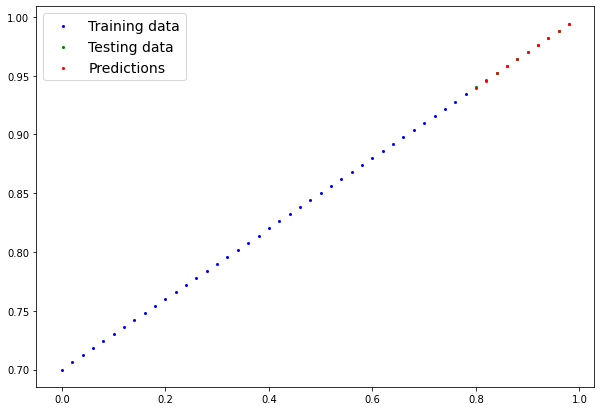

In [15]:
plot_predictions(predictions = y_pred.cpu())

In [19]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents= True, exist_ok =True)
MODEL_NAME = "02_pyTorch_linear_regression.py"

MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
print(f"Mosel save to:{MODEL_SAVE_PATH}")
torch.save(model2.state_dict(), f= MODEL_SAVE_PATH)




Mosel save to:models/02_pyTorch_linear_regression.py


In [22]:
loaded_model_2 = Linearregressionmodel2()
loaded_model_2.load_state_dict(torch.load(MODEL_SAVE_PATH))
loaded_model_2.to(device)
print(f"Loaded_model:{loaded_model_2}")
print(f"Model uses{next(loaded_model_2.parameters()).device}")



Loaded_model:Linearregressionmodel2()
Model usescuda:0


In [24]:
loaded_model_2.eval()
with torch.inference_mode():
  y_pred2 = loaded_model_2(X_test)


y_pred2==y_pred


tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')